# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


# Data Description
This dataset includes a variety of homes, focusing on their costs and key selling points. The features include the price, area, bedrooms, bathrooms, number of stories, whether it's located on a main road, the presence of a guestroom and basement, whether it has hot water heating, air conditioning, the number of parking spots, if it is in a preferable area and whether it's furnished or not.

The target feature is the Price. We're going to look at the key attributes that affect the price the most.

      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  
Missing values in each column:
price               0
area                0
bedrooms            0
ba

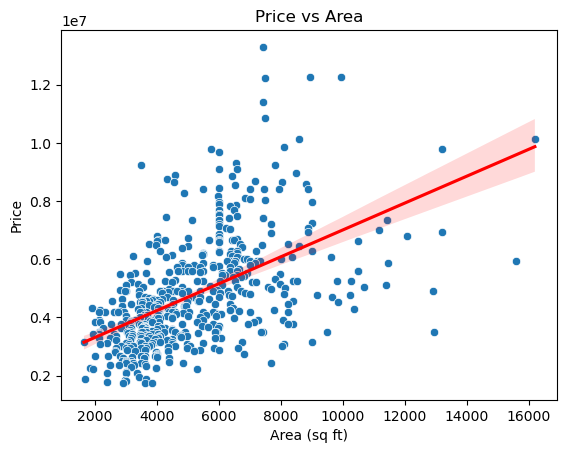

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Corrected CSV reading
df = pd.read_csv("HousingPrice.csv")

# Display first few rows
print(df.head())

# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())

# Scatter plot with regression line
sns.scatterplot(data=df, x='area', y='price')
sns.regplot(data=df, x='area', y='price', scatter=False, color='red')
plt.title('Price vs Area')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.show()


### Insight
The area of the home is very positively correlated with the price: the bigger the house, the more expensive it is.

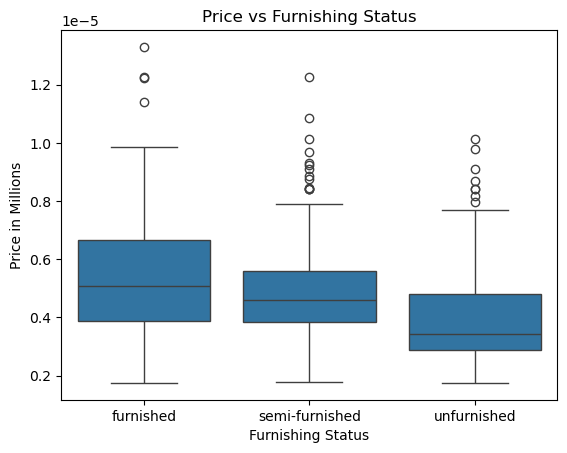

In [13]:
# Box plot for Price vs Furnishing Status
df['price'] = df['price'] / 1_000_000
sns.boxplot(data=df, x='furnishingstatus', y='price')
plt.title('Price vs Furnishing Status')
plt.xlabel('Furnishing Status')
plt.ylabel('Price in Millions')
plt.show()


### Insight
Even with a few outliers in each category, it's quite clear from the blox plots that the more furniture included in the house, the greater the price that can be demanded.

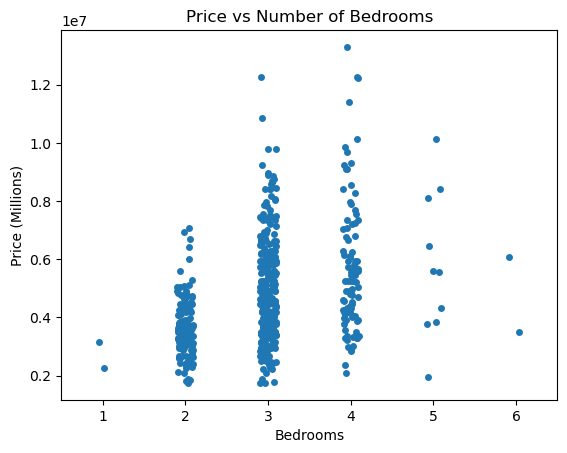

In [17]:
# Strip plot for Price vs Bedrooms
sns.stripplot(data=df, x='bedrooms', y='price', jitter=True)
plt.title('Price vs Number of Bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Price (Millions)')
plt.show()


### Insight
It doesn't look like there is as strong of a correlation between the price and the number of bedrooms in a house. Some of the most expensive houses have an average number of bedrooms (3-4).

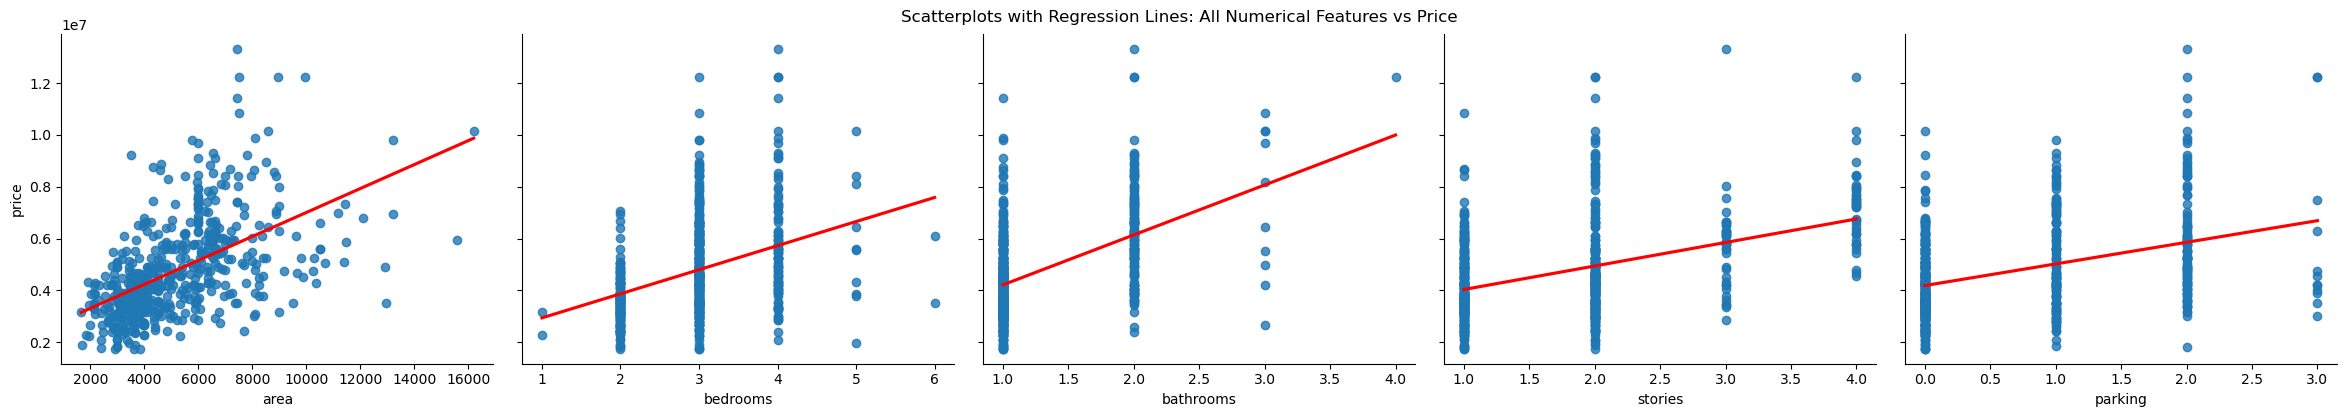

In [23]:
import matplotlib.pyplot as plt

# Select all numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64'])

# PairGrid with regression lines
g = sns.PairGrid(numerical_features, y_vars=['price'], x_vars=[col for col in numerical_features.columns if col != 'price'], height=4, aspect=1.2)
g.map(sns.regplot, scatter=True, ci=None, line_kws={"color": "red"})
g.fig.suptitle('Scatterplots with Regression Lines: All Numerical Features vs Price', y=1.02)
plt.show()

### Inisght
It appears that all of the numerical features contribute to an increase in price. The strogest two factors are the area of the house and number of bathrooms, with the number of bedrooms coming in a close third.